                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

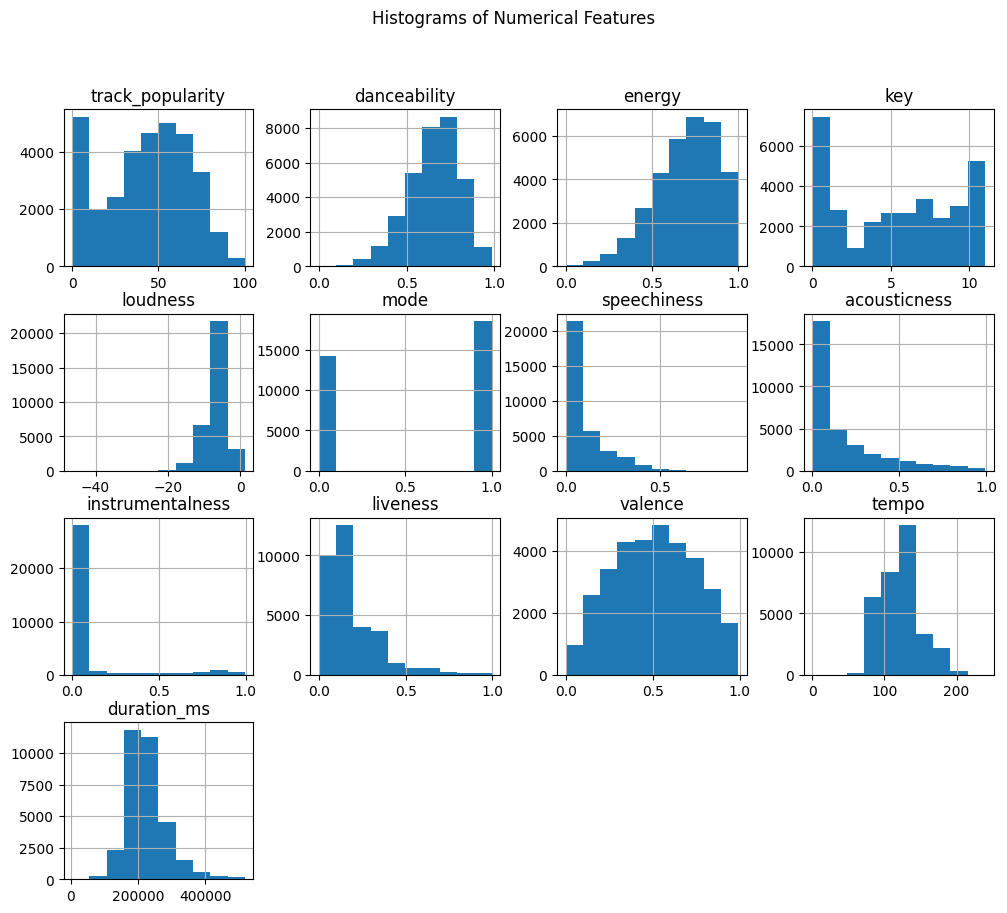

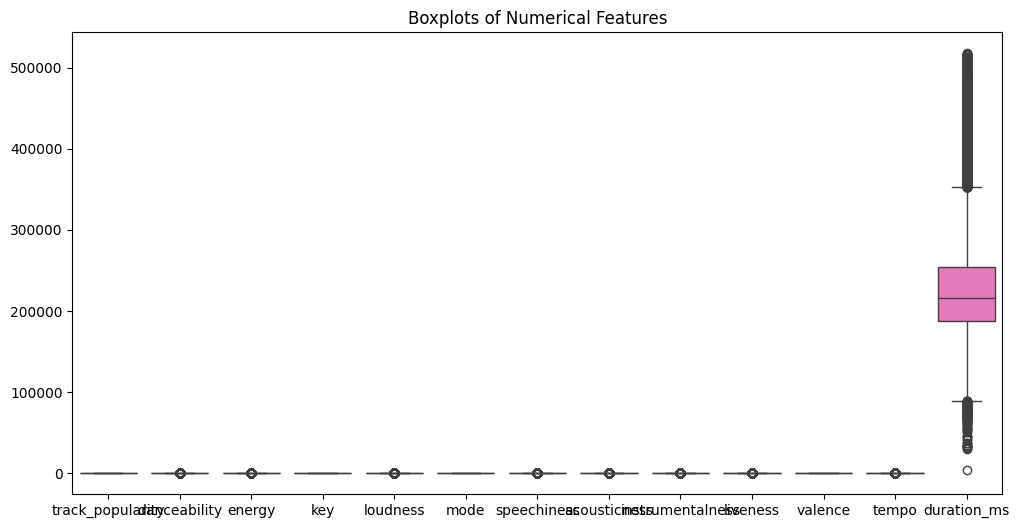

KeyError: "['genre'] not in index"

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 1: Load the Dataset
data = pd.read_csv('spotify_dataset.csv')

# Step 2: Explore the Dataset
print(data.head())
print(data.info())
print(data.describe())

# Step 3: Data Preprocessing
# Handling Missing Values
data.dropna(inplace=True)  # Drop rows with missing values

# Feature Selection
# Assuming 'genre', 'playlist_name' are categorical and numerical features are required
features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = ['genre', 'playlist_name']  # Change according to your dataset

# Data Normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Step 4: Data Analysis and Visualizations

# 4.1 Histograms
data.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# 4.2 Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[features])
plt.title('Boxplots of Numerical Features')
plt.show()

# 4.3 Pair Plots
sns.pairplot(data[features + categorical_features])
plt.suptitle('Pair Plots of Features', y=1.02)
plt.show()

# 4.4 Count Plots
plt.figure(figsize=(10, 5))
sns.countplot(x='genre', data=data)
plt.title('Count of Songs by Genre')
plt.xticks(rotation=45)
plt.show()

# Step 5: Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 6: Clustering
# Determine optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
k_values = range(2, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plotting Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Plotting Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Choosing an optimal k (e.g., 5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Step 7: Visualization of Clusters
# Using PCA for 2D visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['cluster'], cmap='viridis')
plt.title('Clusters of Songs after PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 8: Building a Recommendation System (Basic Example)
def recommend_songs(genre, num_recommendations=5):
    recommendations = data[data['genre'] == genre].sample(n=num_recommendations)
    return recommendations[['song_title', 'artist', 'playlist_name']]

# Example usage
recommended_songs = recommend_songs('Pop', num_recommendations=5)
print("Recommended Songs:\n", recommended_songs)
